# _Wine quality_
### Author: Łukasz Tenerowicz
About dataset:\
This dataset is related to red variant of Portuguese "Vinho Verde" wine. Included columns contain such information like sulfur dioxide (free and bound) added to wines, density, pH, alcohol, quality etc. The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by experts). Each wine expert graded the wine quality between 0 (very bad) and 10 (very excellent). More details are available on [this page](https://www.kaggle.com/datasets/danielpanizzo/wine-quality).


## 1. Basic data presentation/exploration

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

wine_df = pd.read_csv('wineQualityReds.csv')
wine_df.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [104]:
wine_df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


That is how first rows look like in our dataset.

In [105]:
wine_df.isna().sum().to_frame()

,0
Unnamed: 0,0
fixed.acidity,0
volatile.acidity,0
citric.acid,0
residual.sugar,0
chlorides,0
free.sulfur.dioxide,0
total.sulfur.dioxide,0
density,0
pH,0


Our dataset has no corrupted data (null values), so we can start analysis.

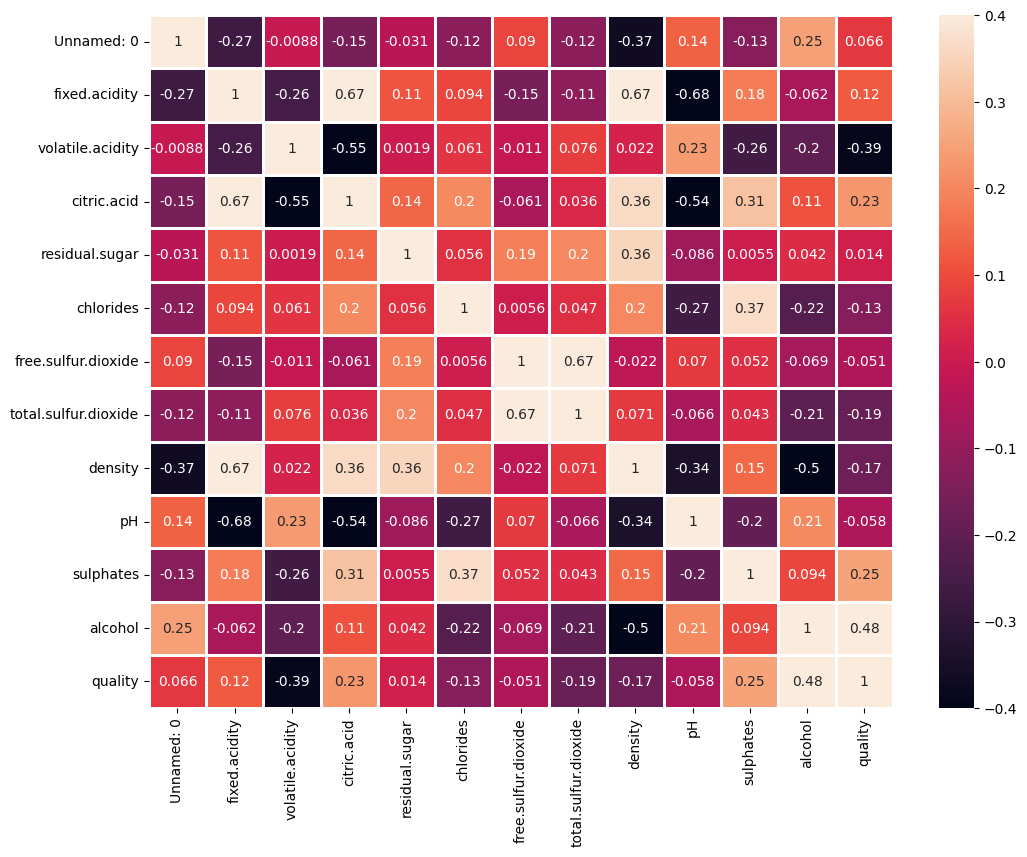

In [106]:
corr = wine_df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corr, 
            vmax=0.4, vmin=-0.4,linewidths=1, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Above heatmap show us simpe correlation between each of attributes in data frame. The darker shade the worse correlation is.

## Linear regression

In [107]:
wine_df.columns = wine_df.columns.str.replace(r"[.]", "_")
print(wine_df.columns)
X = wine_df.total_sulfur_dioxide.values.reshape(-1,1)[:1000]
y = wine_df.free_sulfur_dioxide.values.reshape(-1)[:1000]

model = LinearRegression() 
model.fit(X, y)

Index(['Unnamed: 0', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


C:\Users\lukasz\AppData\Local\Temp\ipykernel_10380\1655174225.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wine_df.columns = wine_df.columns.str.replace(r"[.]", "_")


LinearRegression()

Created and trained simple regression model of total sulfur dioxide to free sulfur dioxide and changed column names (swap `'.'` to `'_'`).

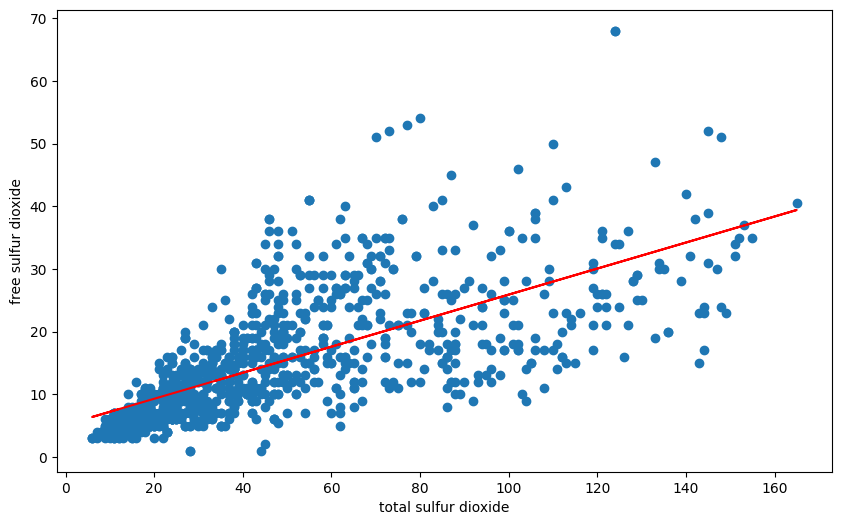

In [108]:
pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.xlabel('total sulfur dioxide')
plt.ylabel('free sulfur dioxide')
plt.scatter(X, y)
plt.plot(X, pred, c='red')

Visualisation of created model. Method used here on `model` object allows us to predict `free sulfur dioxide` depending on given `total sulfur dioxide` values.

Below we have linear regression with higher order polynomial.

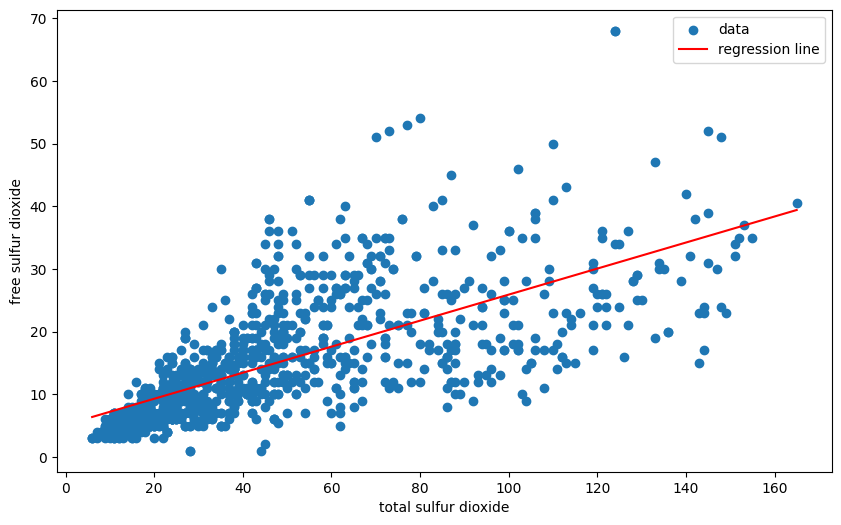

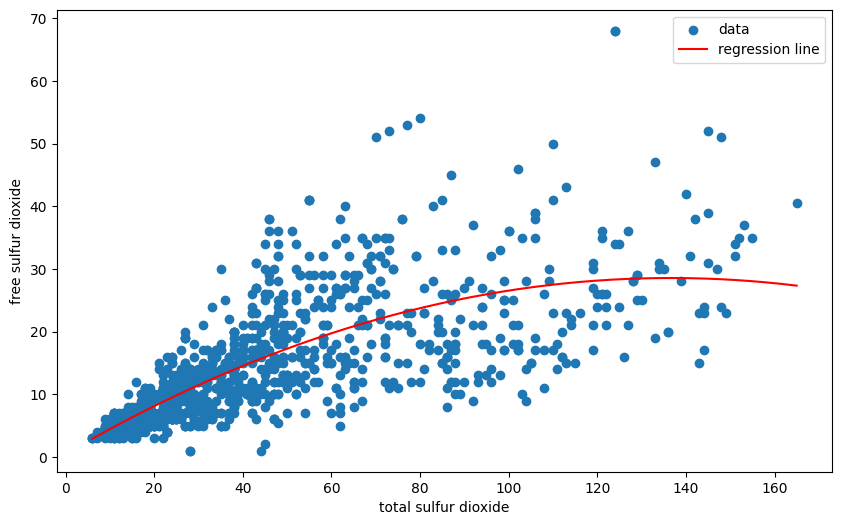

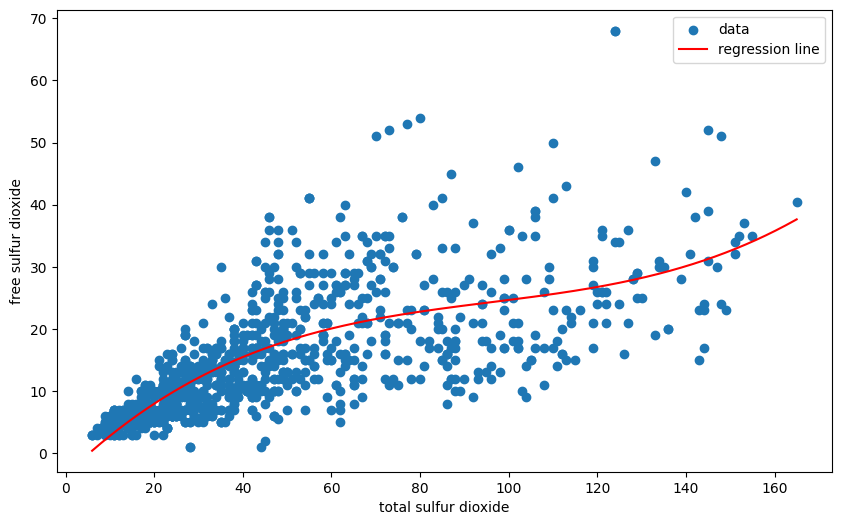

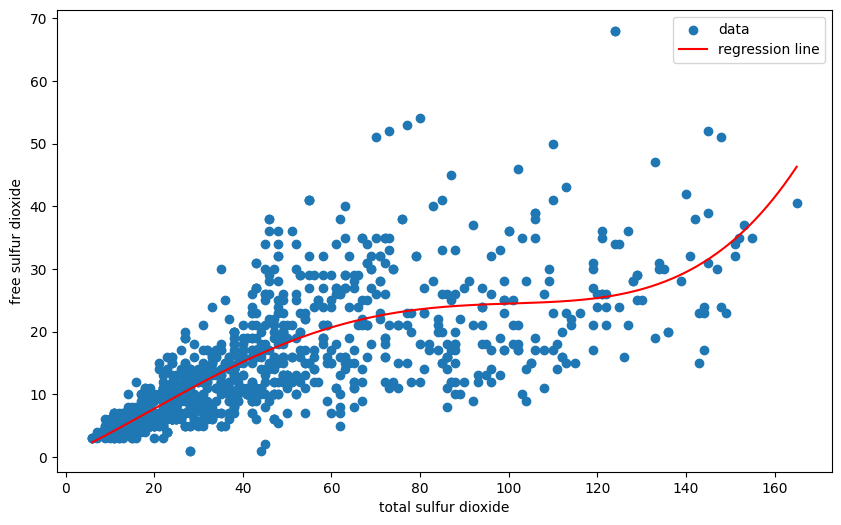

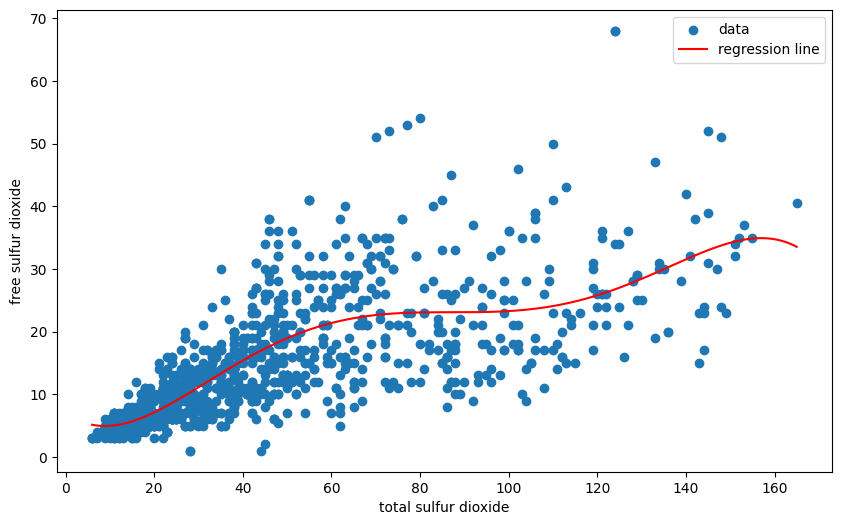

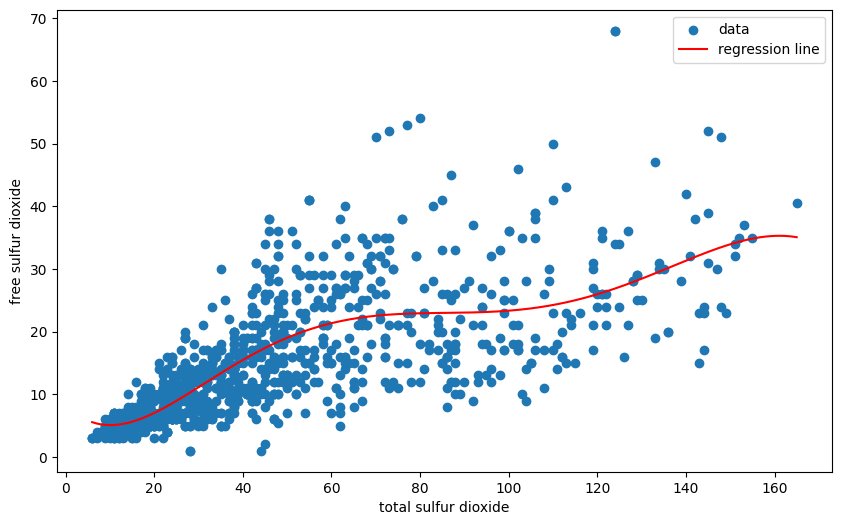

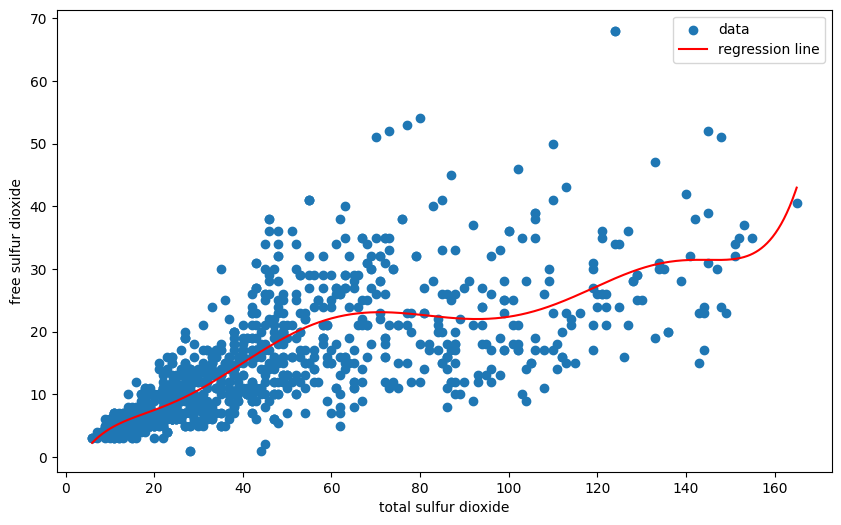

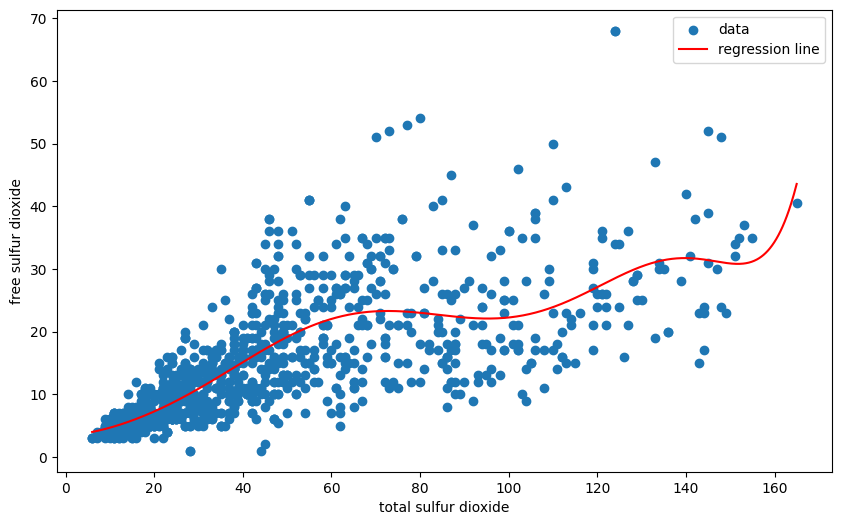

In [109]:
for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    plt.figure(figsize=(10,6))
    pol_reg = LinearRegression()
    pol_reg.fit(X_order, y)

    df = pd.DataFrame({'X': X.reshape(-1), 'y': pol_reg.predict(X_order)})
    df = df.sort_values(by='X', axis=0, ascending=True)

    poly_fit = np.polyfit(df['X'], df['y'], deg=order)
    p1d = np.poly1d(poly_fit)
    X_temp = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))

    plt.xlabel('total sulfur dioxide')
    plt.ylabel('free sulfur dioxide')
    plt.scatter(X, y, label='data')
    plt.plot(X_temp, p1d(X_temp), color='red', label='regression line')
    plt.legend()

plt.show()


As we can see the best polynomial fit is received with order equal 3 or 4.

Now lets swap X and y attributes: now X will contain `free sulfur dioxide` and y: `total sulfur dioxide`.

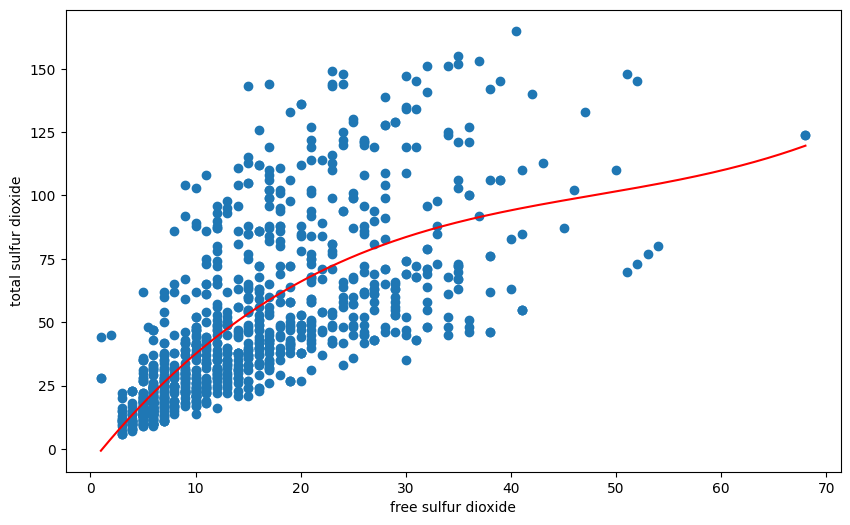

In [110]:
X = wine_df.free_sulfur_dioxide.values.reshape(-1,1)[:1000]
y = wine_df.total_sulfur_dioxide.values.reshape(-1)[:1000]

poly = PolynomialFeatures(degree=3, include_bias=False)
X_transformed = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_transformed, y)

df = pd.DataFrame({'X': X.reshape(-1), 'y': model.predict(X_transformed)})
df = df.sort_values(by='X', axis=0, ascending=True)
poly_fit = np.polyfit(df['X'], df['y'], deg=order)
p1d = np.poly1d(poly_fit)
X_temp = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))

plt.figure(figsize=(10,6))
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.scatter(X, y)

plt.plot(X_temp, p1d(X_temp), color='red')

As we can see new `X` set has worse value distribution than in previous plot version. Here we have empty space between 55-67 `free sulfur dioxide` and only one point near 70, so in this part regression model could be inaccurate.

Now lets check correlation between wine quality grade and alcohol concentration.

Text(0, 0.5, 'alcohol')

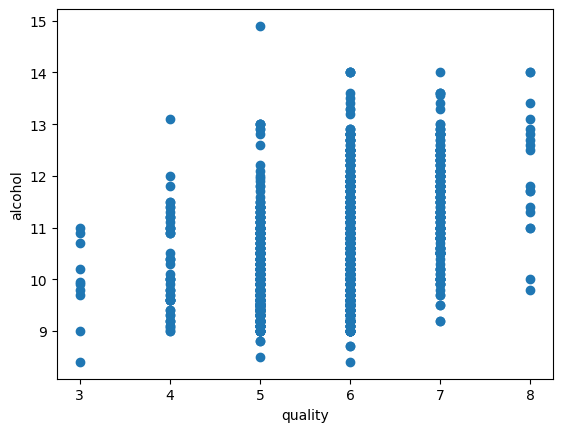

In [111]:
plt.scatter(wine_df.quality.values, wine_df.alcohol.values)
plt.xlabel('quality')
plt.ylabel('alcohol')

There is some correlation between these two factors, but we can't say that is a stronge one.\
Below the same with boxplot.

<AxesSubplot: title={'center': 'alcohol'}, xlabel='[quality]'>

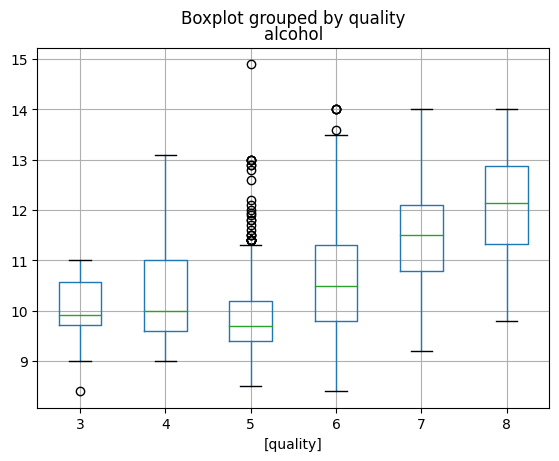

In [112]:
wine_df.boxplot(column=['alcohol'], by=['quality'])

We can apply more features to get better model for predicting free sulfur dioxide.

In [113]:
X = wine_df['total_sulfur_dioxide'].values.reshape(-1,1)[:1000]
y = wine_df.free_sulfur_dioxide.values.reshape(-1)[:1000]

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

# Better model:
# added 'residual_sugar' to X data frame, rest the same
X = wine_df[['residual_sugar', 'total_sulfur_dioxide']].values.reshape(-1,2)[:1000]
y = wine_df.free_sulfur_dioxide.values.reshape(-1)[:1000]

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 53.12556239430121
Mean squared error equals: 52.65531269241945


Here I added only one features to `X` data frame (`residual sugar`) and it improved mean squared error. However additional features should be picked carefully - if some attribute has weak correlation with feature we want to predict, then it could compound MSE.

## Training and test errors
Below I split my data into training sample and test sample and then I repeated previous linear regressions with different degrees. Then I plotted training and test errors for all models.

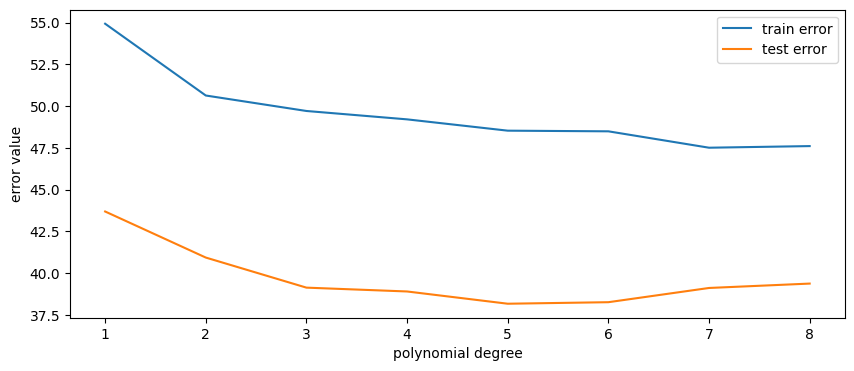

In [114]:
train_err = []
test_err = []

X = wine_df.total_sulfur_dioxide.values.reshape(-1,1)[:1000]
y = wine_df.free_sulfur_dioxide.values.reshape(-1)[:1000]

model = LinearRegression()

for order in range(1,9):
    poly = PolynomialFeatures(degree=order, include_bias=False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_err.append(mean_squared_error(y_train, pred_train))
    test_err.append(mean_squared_error(y_test, pred_test))

x = np.arange(1, 9)
plt.figure(figsize=(10,4))

plt.xlabel('polynomial degree')
plt.ylabel('error value')
plt.plot(x, train_err, label='train error')
plt.plot(x, test_err, label='test error')
plt.legend()
plt.show()

As we can see train error is getting smaller with polynomial degree increase what we cannot say about test error. It is getting smaller from 1 to 5 polynomial degree and then it is growing. Additionally train error is much smaller than test error.